**K-Nearest Neighbors (KNN)** é um algoritmo de classificação. A ideia central é que os pontos de dados com atributos semelhantes tendem a ser da mesma classe.

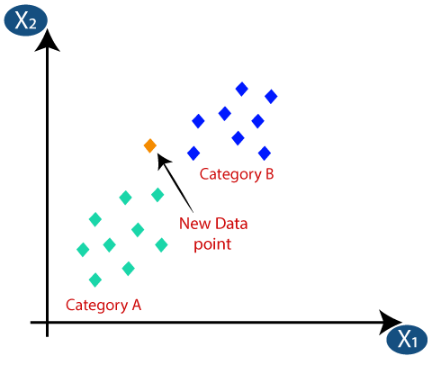

In [1]:
from IPython.display import Image
Image('KNN1.png')

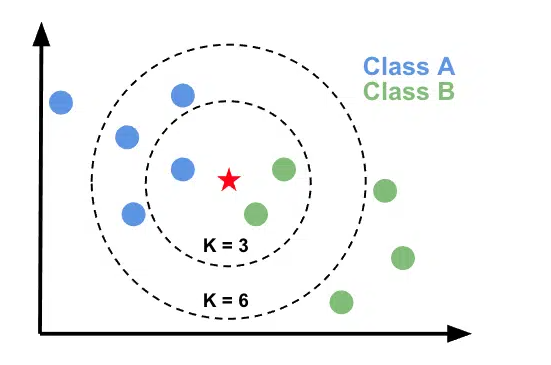

In [2]:
Image('KNN2.png')

## Distância entre dois pontos

### 1. Distância euclidiana

A distância euclidiana é a fórmula de distância mais comumente usada. Para encontrar a distância euclidiana entre dois pontos, primeiro calculamos a distância quadrada entre cada dimensão. Se somarmos todas essas diferenças quadradas e tirarmos a raiz quadrada, calculamos a distância euclidiana.

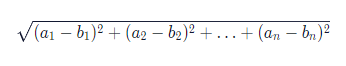

In [3]:
Image('distância euclidiana.png')

In [4]:
def distancia_euclidiana(pt1, pt2):
    distancia = 0
    for i in range(len(pt1)):
        distancia += (pt1[i] - pt2[i]) ** 2
    
    return distancia ** 0.5

print(distancia_euclidiana([1, 2], [4, 0]))
print(distancia_euclidiana([5, 4, 3], [1, 7, 9]))

3.605551275463989
7.810249675906654


### Distância de Manhattan

A distância de Manhattan é semelhante à distância euclidiana. Em vez de somar a diferença quadrada entre cada dimensão, somamos o valor absoluto da diferença entre cada dimensão. Chama-se distância de Manhattan porque é semelhante a como você pode navegar ao caminhar pelos quarteirões da cidade. Se você já se perguntou “quantos quarteirões levarei para ir do ponto A ao ponto B”, você calculou a distância de Manhattan.

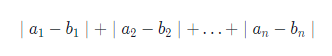

In [5]:
Image('distância de Manhattan.png')

### Distância Entre Pontos - 2D

In [6]:
O_Poderoso_Chefão = [175, 1972]
Batman_O_Cavaleiro_das_Trevas = [152, 2008]
Matrix = [136, 1999]

print(distancia_euclidiana(O_Poderoso_Chefão, Batman_O_Cavaleiro_das_Trevas))
print(distancia_euclidiana(O_Poderoso_Chefão, Matrix))

42.720018726587654
47.43416490252569


### Distância Entre Pontos - 3D

In [7]:
O_Poderoso_Chefão = [175, 1972,6000000]
Batman_O_Cavaleiro_das_Trevas = [152, 2008,180000000]
Matrix = [136, 1999, 63000000]

print(distancia_euclidiana(O_Poderoso_Chefão, Batman_O_Cavaleiro_das_Trevas))
print(distancia_euclidiana(O_Poderoso_Chefão, Matrix))

174000000.00000525
57000000.00001974


### KNN Classificação

In [8]:
import pandas as pd

In [9]:
alunos = pd.read_csv('dados_alunos.csv')

In [10]:
alunos.head()

,hours_studied,practice_test,passed_exam
0,0,55,0
1,1,75,0
2,2,32,0
3,3,80,0
4,4,75,0


In [11]:
x = alunos[['hours_studied','practice_test']]
y = alunos[['passed_exam']]

### Dados com diferentes escalas: normalização

#### Normalização Mín-Máx

A normalização min-max é uma das maneiras mais comuns de normalizar dados. Para cada recurso, o valor mínimo desse recurso é transformado em 0, o valor máximo é transformado em 1 e todos os outros valores são transformados em um decimal entre 0 e 1.

Por exemplo, se o valor mínimo de um recurso for 20 e o valor máximo for 40, então 30 será transformado em cerca de 0,5, pois está entre 20 e 40. A fórmula é a seguinte:

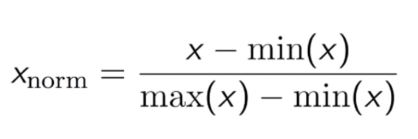

In [12]:
Image('normalização.png')

In [13]:
from sklearn.preprocessing import MinMaxScaler

normalizacao = MinMaxScaler()
normalizacao.fit(x)
x = normalizacao.transform(x)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# treinando o modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [15]:
# prevendo as classes
y_pred = knn.predict(x)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1]


### Matriz de Confusão

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



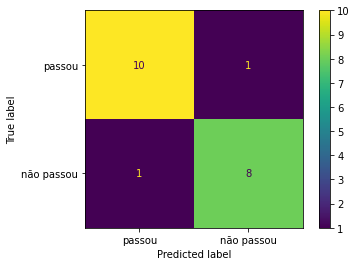

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mc = confusion_matrix(y,y_pred)
exibir_mc = ConfusionMatrixDisplay(confusion_matrix=mc,display_labels = ["passou","não passou"])
exibir_mc.plot()
plt.show()

### Testando diferentes valores de K

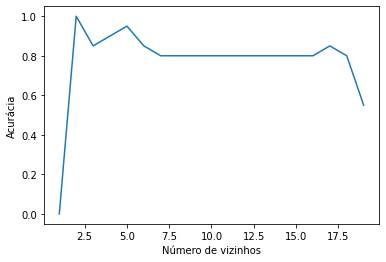

In [18]:
import numpy as np

vizinhos = np.arange(1,len(x))
acuracia = np.empty(len(vizinhos))
 
for k in range(1,len(x)-1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y.values.ravel())
    acuracia[k] = knn.score(x, y)

plt.plot(vizinhos, acuracia)
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [19]:
k = 0
for i in acuracia:
    print("k: ",k," acuracia ",i)
    k+=1

k:  0  acuracia  0.0
k:  1  acuracia  1.0
k:  2  acuracia  0.85
k:  3  acuracia  0.9
k:  4  acuracia  0.95
k:  5  acuracia  0.85
k:  6  acuracia  0.8
k:  7  acuracia  0.8
k:  8  acuracia  0.8
k:  9  acuracia  0.8
k:  10  acuracia  0.8
k:  11  acuracia  0.8
k:  12  acuracia  0.8
k:  13  acuracia  0.8
k:  14  acuracia  0.8
k:  15  acuracia  0.8
k:  16  acuracia  0.85
k:  17  acuracia  0.8
k:  18  acuracia  0.55


### KNN Regressão

In [20]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregando o conjunto de dados 
moradias = pd.read_csv('moradias.csv')
moradias.head()

# plotar o gráfico de correlação
corr = moradias.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.00,-0.13,-0.07,-0.11,-0.11,0.01,-0.08,0.03,0.06,-0.02,-0.07,-0.06,-0.06,-0.03,-0.00,-0.02
rent,-0.13,1.00,0.64,0.77,0.86,0.04,0.22,-0.13,-0.10,0.04,0.05,0.03,0.05,0.05,0.03,0.04
bedrooms,-0.07,0.64,1.00,0.72,0.77,0.08,0.04,0.04,-0.10,0.00,0.01,-0.02,-0.01,0.01,0.00,-0.00
bathrooms,-0.11,0.77,0.72,1.00,0.80,0.09,0.13,-0.10,-0.06,0.02,0.03,0.01,0.02,0.04,0.04,0.03
size_sqft,-0.11,0.86,0.77,0.80,1.00,0.04,0.11,0.01,-0.14,0.02,0.04,0.03,0.04,0.05,0.02,0.03
min_to_subway,0.01,0.04,0.08,0.09,0.04,1.00,0.08,-0.18,0.08,-0.02,-0.00,-0.01,-0.00,-0.01,0.00,-0.00
floor,-0.08,0.22,0.04,0.13,0.11,0.08,1.00,-0.39,0.10,0.06,0.04,0.10,0.07,0.00,0.06,0.07
building_age_yrs,0.03,-0.13,0.04,-0.10,0.01,-0.18,-0.39,1.00,-0.22,-0.04,-0.03,-0.05,-0.06,-0.03,-0.05,-0.06
no_fee,0.06,-0.10,-0.10,-0.06,-0.14,0.08,0.10,-0.22,1.00,-0.10,-0.07,-0.18,-0.16,-0.08,-0.05,-0.10
has_roofdeck,-0.02,0.04,0.00,0.02,0.02,-0.02,0.06,-0.04,-0.10,1.00,0.31,0.49,0.52,0.33,0.12,0.56


In [21]:
#Características dos imóveis
x = moradias[['bedrooms','bathrooms','size_sqft']]
#Valor do aluguel
y = moradias[['rent']]

In [22]:
# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
# Criando um regressor KNN com k=3
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Treinando o modelo com os dados de treino
knn_regressor.fit(X_train, y_train.values.ravel())

KNeighborsRegressor(n_neighbors=3)

In [24]:
# Fazendo previsões com os dados de teste
previsoes = knn_regressor.predict(X_test)

In [25]:
# Calculando métricas de desempenho
mse = mean_squared_error(y_test, previsoes)  # Erro quadrático médio
r2 = r2_score(y_test, previsoes)  # Coeficiente de determinação (R^2)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R^2): {r2:.2f}")

Erro Quadrático Médio (MSE): 2561852.44
Coeficiente de Determinação (R^2): 0.72


In [29]:
# Testando com diferentes valores de K
for k in range(1, 20):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train.values.ravel())
    previsoes = knn_regressor.predict(X_test)
    r2 = r2_score(y_test, previsoes)
    print(f"K = {k}: R^2 = {r2:.2f}")

K = 1: R^2 = 0.58
K = 2: R^2 = 0.69
K = 3: R^2 = 0.72
K = 4: R^2 = 0.73
K = 5: R^2 = 0.73
K = 6: R^2 = 0.74
K = 7: R^2 = 0.74
K = 8: R^2 = 0.74
K = 9: R^2 = 0.74
K = 10: R^2 = 0.74
K = 11: R^2 = 0.74
K = 12: R^2 = 0.75
K = 13: R^2 = 0.75
K = 14: R^2 = 0.75
K = 15: R^2 = 0.75
K = 16: R^2 = 0.75
K = 17: R^2 = 0.75
K = 18: R^2 = 0.75
K = 19: R^2 = 0.75


# Fim